In [1]:
# pip install datasets

In [2]:
# pip install spacy

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datasets as ds
import warnings
import nltk
import re
import contractions
import spacy
import string
warnings.filterwarnings('ignore')
%matplotlib inline

plt.style.use('ggplot')

In [2]:
from datasets import list_datasets, load_dataset
from pprint import pprint

In [3]:
df = load_dataset('amazon_us_reviews', 'Grocery_v1_00')

Found cached dataset amazon_us_reviews (C:/Users/sande/.cache/huggingface/datasets/amazon_us_reviews/Grocery_v1_00/0.1.0/17b2481be59723469538adeb8fd0a68b0ba363bbbdd71090e72c325ee6c7e563)


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df

DatasetDict({
    train: Dataset({
        features: ['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date'],
        num_rows: 2402458
    })
})

In [5]:
df = pd.DataFrame(df['train'])

In [6]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,42521656,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5,0,0,0,1,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",2015-08-31
1,US,12049833,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5,0,0,0,1,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31
2,US,107642,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5,0,0,0,0,Five Stars,This green tea tastes so good! My girlfriend l...,2015-08-31
3,US,6042304,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5,0,0,0,1,Five Stars,I love Melissa's brand but this is a great sec...,2015-08-31
4,US,18123821,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5,0,0,0,1,Five Stars,good,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402453,US,50385921,RZVFIWM72OSA0,B00004TBB0,738532654,Celestial Seasonings - Herbal Tea Caffeine Fre...,Grocery,4,0,4,0,0,Different,The Amor Belhom Duo are likely the only musici...,2000-12-05
2402454,US,50377094,R35K50CF47311S,B00000K1X9,161697639,479 NATL SHOW HRSE BAY PINTO 6,Grocery,5,0,0,0,0,This Horse Is Gorgourges!,Being a Breyer collecter almost all of ...,1999-12-29
2402455,US,50740327,R1N80O7XL5ODNC,B00000K1X9,161697639,479 NATL SHOW HRSE BAY PINTO 6,Grocery,5,5,5,0,0,"brilliant, realistic model!",This model is beautiful. each model is hand p...,1999-11-21
2402456,US,51700314,R1E9RSEX4R6TIR,B00000K1X9,161697639,479 NATL SHOW HRSE BAY PINTO 6,Grocery,5,1,1,0,0,don't have it yet..but will soon,As a person who has collected Breyers all my l...,1999-11-17


In [7]:
df.nunique()

marketplace                1
customer_id          1363986
review_id            2402458
product_id            305512
product_parent        268150
product_title         273649
product_category           1
star_rating                5
helpful_votes            564
total_votes              603
vine                       2
verified_purchase          2
review_headline      1273809
review_body          2226079
review_date             4404
dtype: int64

In [8]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

# Basic NLTK

In [9]:
headline = df['review_headline'][0]
print(headline)

Using these for years - love them.


In [10]:
body = df['review_body'][0]
print(body)

As a family allergic to wheat, dairy, eggs, nuts, and several other things, we love the entire Cravings Place line of products as it allows us to bake treats with minimal effort and ingredients. Most allergy-free and gluten-free mixes usually just omit one or two allergens at most, so it's great to see a mix created without many of the most common allergens. (Note these still have soy and corn). We consume these on a regular basis and have been doing so for years.


In [11]:
nltk.download('punkt')
tokens1 = nltk.word_tokenize(headline)
tokens1[:10]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Using', 'these', 'for', 'years', '-', 'love', 'them', '.']

In [12]:
tokens2 = nltk.word_tokenize(body)
tokens2[:10]

['As', 'a', 'family', 'allergic', 'to', 'wheat', ',', 'dairy', ',', 'eggs']

In [13]:
nltk.download('averaged_perceptron_tagger')
tagged1 = nltk.pos_tag(tokens1)
tagged1[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Using', 'VBG'),
 ('these', 'DT'),
 ('for', 'IN'),
 ('years', 'NNS'),
 ('-', ':'),
 ('love', 'VB'),
 ('them', 'PRP'),
 ('.', '.')]

In [17]:
# perform part-of-speech tagging on a list of tokens

In [14]:
tagged2 = nltk.pos_tag(tokens2)
tagged2[:10]

[('As', 'IN'),
 ('a', 'DT'),
 ('family', 'NN'),
 ('allergic', 'NN'),
 ('to', 'TO'),
 ('wheat', 'VB'),
 (',', ','),
 ('dairy', 'NN'),
 (',', ','),
 ('eggs', 'NNS')]

In [15]:
nltk.download('words')
nltk.download('maxent_ne_chunker')
entities = nltk.chunk.ne_chunk(tagged1)
entities.pprint()

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...


(S Using/VBG these/DT for/IN years/NNS -/: love/VB them/PRP ./.)


[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [18]:
# perform named entity recognition (NER) on some tagged text.

In [16]:
'''
IN: Preposition or subordinating conjunction || DT: Determiner || NN: Noun ||   
singular or mass || VB: Verb, base form || NNS: Noun, plural || CC: Coordinating conjunction ||   
JJ: Adjective || PRP: Personal pronoun || VBP: Verb, non-3rd person singular present ||   
ORGANIZATION: Organization (named entity type) || NNP: Proper noun, singular ||   
CD: Cardinal number || RB: Adverb || JJS: Adjective, superlative 
'''
entities = nltk.chunk.ne_chunk(tagged2)
entities.pprint()

(S
  As/IN
  a/DT
  family/NN
  allergic/NN
  to/TO
  wheat/VB
  ,/,
  dairy/NN
  ,/,
  eggs/NNS
  ,/,
  nuts/NNS
  ,/,
  and/CC
  several/JJ
  other/JJ
  things/NNS
  ,/,
  we/PRP
  love/VBP
  the/DT
  entire/JJ
  (ORGANIZATION Cravings/NNP Place/NNP)
  line/NN
  of/IN
  products/NNS
  as/IN
  it/PRP
  allows/VBZ
  us/PRP
  to/TO
  bake/VB
  treats/NNS
  with/IN
  minimal/JJ
  effort/NN
  and/CC
  ingredients/NNS
  ./.
  Most/JJS
  allergy-free/JJ
  and/CC
  gluten-free/JJ
  mixes/NNS
  usually/RB
  just/RB
  omit/VB
  one/CD
  or/CC
  two/CD
  allergens/NNS
  at/IN
  most/JJS
  ,/,
  so/IN
  it/PRP
  's/VBZ
  great/JJ
  to/TO
  see/VB
  a/DT
  mix/NN
  created/VBD
  without/IN
  many/JJ
  of/IN
  the/DT
  most/RBS
  common/JJ
  allergens/NNS
  ./.
  (/(
  Note/IN
  these/DT
  still/RB
  have/VBP
  soy/NNS
  and/CC
  corn/NN
  )/)
  ./.
  We/PRP
  consume/VBP
  these/DT
  on/IN
  a/DT
  regular/JJ
  basis/NN
  and/CC
  have/VBP
  been/VBN
  doing/VBG
  so/RB
  for/IN
  years/NNS
  ./.

# Data Cleaning

###  ***Converting reviews into lowercase***

In [19]:
df['review_body']=df['review_body'].apply(lambda x: x.lower())

In [20]:
df['review_headline']=df['review_headline'].apply(lambda x: x.lower())

### ***Expanding the Contraction words***

In [21]:
# pip install contractions

In [22]:
def remove_contractions(text):
    return contractions.fix(text)

In [23]:
df['review_body'] = df['review_body'].apply(remove_contractions)

In [24]:
df['review_headline'] = df['review_headline'].apply(remove_contractions)

In [25]:
df['review_body'][0]

'as a family allergic to wheat, dairy, eggs, nuts, and several other things, we love the entire cravings place line of products as it allows us to bake treats with minimal effort and ingredients. most allergy-free and gluten-free mixes usually just omit one or two allergens at most, so it is great to see a mix created without many of the most common allergens. (note these still have soy and corn). we consume these on a regular basis and have been doing so for years.'

### ***Removing the Punctuation words from the text***

In [26]:
def remove_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [27]:
df['review_body'] = df['review_body'].apply(remove_punctuations)

In [28]:
df['review_headline'] = df['review_headline'].apply(remove_punctuations)

In [29]:
df['review_body'][0]

'as a family allergic to wheat dairy eggs nuts and several other things we love the entire cravings place line of products as it allows us to bake treats with minimal effort and ingredients most allergyfree and glutenfree mixes usually just omit one or two allergens at most so it is great to see a mix created without many of the most common allergens note these still have soy and corn we consume these on a regular basis and have been doing so for years'

### ***Removing digits and words containing digits in the Review***

In [30]:
df['review_body'] = df['review_body'].apply(lambda x: re.sub('\w*\d\w*', '', str(x)))

In [31]:
df['review_headline'] = df['review_headline'].apply(lambda x: re.sub('\w*\d\w*', '', str(x)))

### ***Removing extra spaces by swaping multiple spaces with single space***

In [32]:
df['review_body']=df['review_body'].apply(lambda x: re.sub(' +',' ',x))

In [33]:
df['review_headline']=df['review_headline'].apply(lambda x: re.sub(' +',' ',x))

In [34]:
for index,text in enumerate(df['review_body'][0:5]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 as a family allergic to wheat dairy eggs nuts and several other things we love the entire cravings place line of products as it allows us to bake treats with minimal effort and ingredients most allergyfree and glutenfree mixes usually just omit one or two allergens at most so it is great to see a mix created without many of the most common allergens note these still have soy and corn we consume these on a regular basis and have been doing so for years
Review 2:
 my favorite nut creamy crunchy salty and slightly sweet what more could you ask for
Review 3:
 this green tea tastes so good my girlfriend loves it too
Review 4:
 i love melissas brand but this is a great second when i cannot get melissas brand
Review 5:
 good


# Exploratory Data Analysis

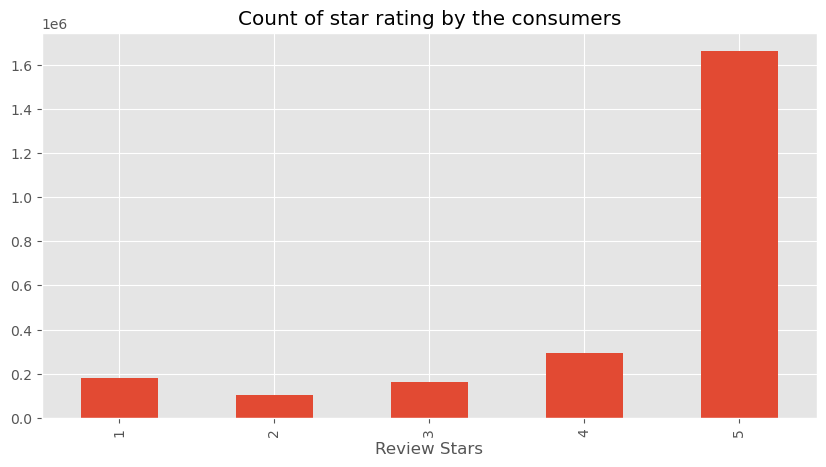

In [35]:
ax = df['star_rating'].value_counts().sort_index().plot(kind='bar',title='Count of star rating by the consumers',figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

# Vader

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [37]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_body']
    myid = row['review_id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/2402458 [00:00<?, ?it/s]

In [38]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'review_id'})
df = vaders.merge(df, how='right')

In [39]:
df.head(5)

,review_id,neg,neu,pos,compound,marketplace,customer_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,R26MV8D0KG6QI6,0.049,0.836,0.115,0.7943,US,42521656,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5,0,0,0,1,using these for years love them,as a family allergic to wheat dairy eggs nuts ...,2015-08-31
1,R1OF8GP57AQ1A0,0.000,0.695,0.305,0.6915,US,12049833,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5,0,0,0,1,wonderful,my favorite nut creamy crunchy salty and sligh...,2015-08-31
2,R3VDC1QB6MC4ZZ,0.000,0.547,0.453,0.8147,US,107642,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5,0,0,0,0,five stars,this green tea tastes so good my girlfriend lo...,2015-08-31
3,R12FA3DCF8F9ER,0.000,0.571,0.429,0.8500,US,6042304,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5,0,0,0,1,five stars,i love melissas brand but this is a great seco...,2015-08-31
4,RTWHVNV6X4CNJ,0.000,0.000,1.000,0.4404,US,18123821,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5,0,0,0,1,five stars,good,2015-08-31


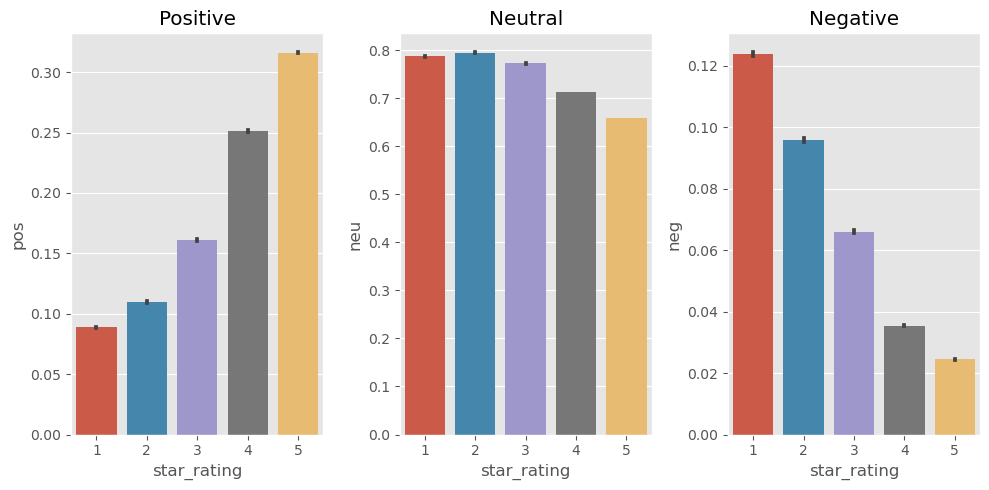

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
sns.barplot(data=df, x='star_rating', y='pos', ax=axs[0])
sns.barplot(data=df, x='star_rating', y='neu', ax=axs[1])
sns.barplot(data=df, x='star_rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [41]:
df['product_title'].value_counts()

San Francisco Bay One Cup                                                        17032
Viva Naturals Organic Extra Virgin Coconut Oil, 16 Ounce                         10068
Nutiva Organic Virgin Coconut Oil, 15 Ounce                                       5798
Davidson's Tea Bulk                                                               5716
Grove Square Cappuccino, Single Serve Cup for Keurig K-Cup Brewers                5146
                                                                                 ...  
Thai Product - Gaba Rice Powder Xongder                                              1
Paint your dream world tea set                                                       1
Kava Instant Coffee, 4 Ounce Glass Jar by J.M. Smucker Company [Foods]               1
Brachs Peppermint Christmas Nougats, 12 oz. (Pack of 2)                              1
Christopher Bean Coffee Ground Coffee, Moon Bean Blend French Roast, 12 Ounce        1
Name: product_title, Length: 273649, dtype:

In [42]:
values_to_match = ['San Francisco Bay One Cup',
                   'Viva Naturals Organic Extra Virgin Coconut Oil, 16 Ounce',
                   'Nutiva Organic Virgin Coconut Oil, 15 Ounce',
                   "Davidson's Tea Bulk",
                   'Grove Square Cappuccino, Single Serve Cup for Keurig K-Cup Brewers']

In [43]:
df2 = df[df['product_title'].isin(values_to_match)].reset_index(drop=True)

In [44]:
df2.shape

(43760, 19)

In [45]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
df2['lemmatized']=df2['review_body'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2402458 entries, 0 to 2402457
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   review_id          object 
 1   neg                float64
 2   neu                float64
 3   pos                float64
 4   compound           float64
 5   marketplace        object 
 6   customer_id        object 
 7   product_id         object 
 8   product_parent     object 
 9   product_title      object 
 10  product_category   object 
 11  star_rating        int64  
 12  helpful_votes      int64  
 13  total_votes        int64  
 14  vine               int64  
 15  verified_purchase  int64  
 16  review_headline    object 
 17  review_body        object 
 18  review_date        object 
dtypes: float64(4), int64(5), object(10)
memory usage: 366.6+ MB


In [47]:
df_grouped=df2[['product_title','lemmatized']].groupby(by='product_title').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
product_title,
Davidson's Tea Bulk,good tea big fan assam tea good malty satisfy ...
"Grove Square Cappuccino, Single Serve Cup for Keurig K-Cup Brewers",tasty coffee great price satisfied excited try...
"Nutiva Organic Virgin Coconut Oil, 15 Ounce",servo different brand coconut oil good gritty ...
San Francisco Bay One Cup,second purchase good coffee unwanted decaf los...
"Viva Naturals Organic Extra Virgin Coconut Oil, 16 Ounce",mmmmmtasty great taste smell great use purpose...


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm=df_dtm.transpose()

In [49]:
df2

,review_id,neg,neu,pos,compound,marketplace,customer_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,lemmatized
0,RCQQGWTC4J4TZ,0.049,0.783,0.167,0.9018,US,27092724,B004NTCE1M,653570135,"Nutiva Organic Virgin Coconut Oil, 15 Ounce",Grocery,4,0,0,0,1,best coconut oil,i have used servo different brands of coconut ...,2015-08-31,servo different brand coconut oil good gritty ...
1,R3FVN7ZCR0LI8H,0.026,0.695,0.279,0.9628,US,52411224,B001EO5Q64,653570135,"Nutiva Organic Virgin Coconut Oil, 15 Ounce",Grocery,5,0,0,0,1,i like to cook sweet items with virgin coconut...,use instead of shortening when baking treats i...,2015-08-31,use instead shortening bake treat like cook sw...
2,R11PWDAIDRYAUA,0.342,0.417,0.242,-0.0516,US,20781116,B00HS6FR98,267956568,San Francisco Bay One Cup,Grocery,5,0,0,0,1,five stars,second purchase good coffee and no unwanted decaf,2015-08-31,second purchase good coffee unwanted decaf
3,R1FTL7ES0ZP1X3,0.025,0.690,0.286,0.9690,US,10146045,B00FRU1KVQ,267956568,San Francisco Bay One Cup,Grocery,5,0,1,0,0,really works in supressing appetite skin looks...,lost lbs in three weeks helps to curb my appet...,2015-08-31,lose lbs week help curb appetite well choice t...
4,R2WFDU8A2JLOJE,0.088,0.853,0.059,-0.3595,US,35057144,B007TGDXMK,267956568,San Francisco Bay One Cup,Grocery,2,0,0,0,1,why will not they label it organic taste is no...,tastes ok it is listed as organic on amazon bu...,2015-08-31,taste ok list organic amazon company label pro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43755,R3G9XMINYJF2ND,0.000,0.535,0.465,0.9633,US,21301746,B000GAT6NG,653570135,"Nutiva Organic Virgin Coconut Oil, 15 Ounce",Grocery,5,4,4,0,1,super product,this is a super product mild smell of fresh co...,2007-01-19,super product mild smell fresh coconut purpose...
43756,R17YYDXIGWXEZX,0.000,1.000,0.000,0.0000,US,16679480,B000GAT6NG,653570135,"Nutiva Organic Virgin Coconut Oil, 15 Ounce",Grocery,5,5,6,0,1,great product,i have had other brands of coconut oil and thi...,2007-01-09,brand coconut oil smell fresher stay way long
43757,R1PC0Z4X9UR4J0,0.083,0.761,0.155,0.6329,US,31187594,B000GAT6NG,653570135,"Nutiva Organic Virgin Coconut Oil, 15 Ounce",Grocery,5,19,25,0,1,delicious coconut oil,i have used coconut oil for some time now and ...,2007-01-09,coconut oil time find fast lb jar good deal lo...
43758,R25Q5959OMMXM0,0.021,0.759,0.220,0.9820,US,49772416,B000GAT6NG,653570135,"Nutiva Organic Virgin Coconut Oil, 15 Ounce",Grocery,5,164,214,0,1,tropical treat,i love this coconut oil it has a delicate coco...,2006-12-14,love coconut oil delicate coconut aroma flavor...


In [50]:
from wordcloud import WordCloud
from textwrap import wrap

In [51]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(5,5))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

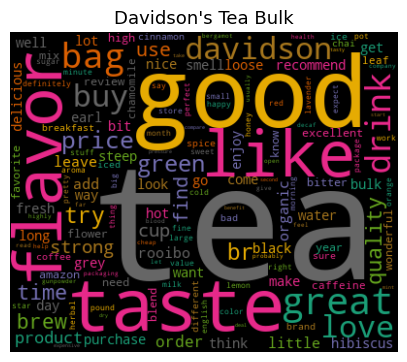

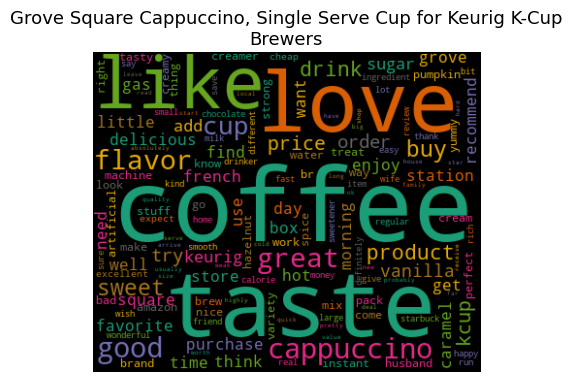

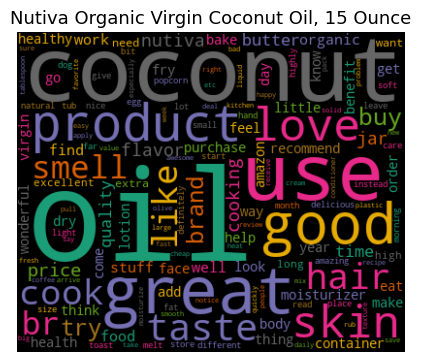

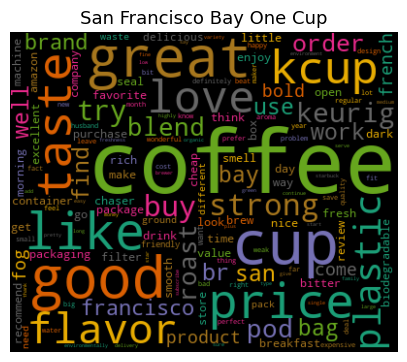

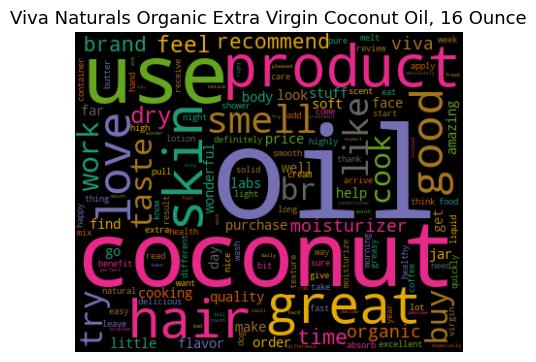

In [52]:
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [53]:
def categorize_sentiment(compound_score):
    if compound_score >= 0.50:
        return 1 
    elif compound_score > -0.05 and compound_score < 0.05:
        return 0  
    else:
        return -1

In [54]:
df2['polarity'] = df2['lemmatized'].apply(lambda x: categorize_sentiment(sia.polarity_scores(x)['compound']))

In [55]:
df2.head(2)

,review_id,neg,neu,pos,compound,marketplace,customer_id,product_id,product_parent,product_title,...,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,lemmatized,polarity
0,RCQQGWTC4J4TZ,0.049,0.783,0.167,0.9018,US,27092724,B004NTCE1M,653570135,"Nutiva Organic Virgin Coconut Oil, 15 Ounce",...,4,0,0,0,1,best coconut oil,i have used servo different brands of coconut ...,2015-08-31,servo different brand coconut oil good gritty ...,1
1,R3FVN7ZCR0LI8H,0.026,0.695,0.279,0.9628,US,52411224,B001EO5Q64,653570135,"Nutiva Organic Virgin Coconut Oil, 15 Ounce",...,5,0,0,0,1,i like to cook sweet items with virgin coconut...,use instead of shortening when baking treats i...,2015-08-31,use instead shortening bake treat like cook sw...,1


In [56]:
df2['polarity'].value_counts()

 1    34540
-1     7505
 0     1715
Name: polarity, dtype: int64

In [57]:
product_polarity_sorted=pd.DataFrame(df2.groupby('product_title')['polarity'].mean().sort_values(ascending=True))

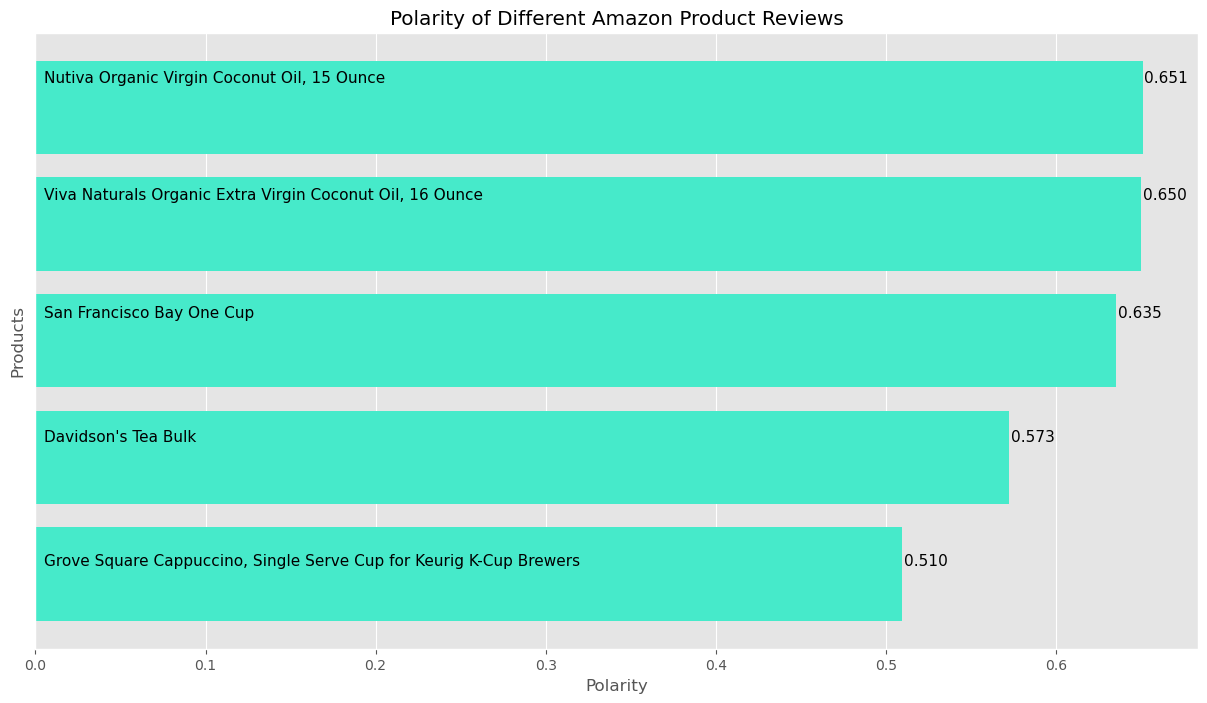

In [58]:
plt.figure(figsize=(15,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(list(range(len(product_polarity_sorted.index))),product_polarity_sorted['polarity'],color='#46EACA')

for i in range(len(polarity_graph)):
    bar = polarity_graph[i]
    # Annotate each bar with its respective product title.
    product = product_polarity_sorted.index[i]
    plt.text(0.005, bar.get_y() + bar.get_width(), '{}'.format(product), va='center', fontsize=11, color='Black')
    # Annotate each bar with its polarity value.
    polarity = product_polarity_sorted['polarity'].iloc[i]
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_width(), '%.3f' % polarity, va='center', fontsize=11, color='black')
  
plt.yticks([])
plt.show()

**So, we can see that Grove Square Cappuccino, Single Serve Cup for Keurig K-Cup Brewers and Davidson'sTea Bulk have the least satisfied customers as they have given a negative review**

# Modeling Using RoBERT

RoBERT is a pretrained model from Hugging Face used for Sentimental Analysis

In [20]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

In [60]:
encoded_text = tokenizer(body, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0138114095, 'roberta_neu': 0.077394396, 'roberta_pos': 0.90879416}


In [21]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [62]:
res = {}
broken_records = []
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        text = row['review_body']
        myid = row['review_id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        broken_records.append(myid)
        print(f'Broke for id {myid}')

  0%|          | 0/43760 [00:00<?, ?it/s]

Broke for id R3MM150I4G2QS8
Broke for id RUJZEZC37JVR4
Broke for id R10WH9DTLLCEJ4
Broke for id RQBWOD301P4B0
Broke for id R3TUQNQVLV63S4
Broke for id R33QOUOBLQ9PX6
Broke for id R3C4R0OU2AZHK1
Broke for id RW13P8E2LHKXJ
Broke for id R3NPHTR7BKEFM3
Broke for id R2SZ3IBMY5ZHNA
Broke for id RSF1F0XLT5P4A
Broke for id RO9XKVSLNOQW3
Broke for id R2733TN84DN1BG
Broke for id R3OIGYSNV0048P
Broke for id R5FILF93JTQU5
Broke for id R3Q0SNAB8JRLQ1
Broke for id R26ILU352B77A3
Broke for id R2GP1VBE46GY8C
Broke for id R2YK4PD8C8K683
Broke for id R3NTCCK1OK9ZAG
Broke for id R3H9O1M2JOJVQF
Broke for id R1XMRF99KR4O81
Broke for id R1PTMD87V7FBJN
Broke for id R1RF8WOVJ7FPIT
Broke for id R1ZAPM4QYIA9WR
Broke for id R1DUA3BUH4YAXE
Broke for id RQ9LDAXYEEX6N
Broke for id R2TL90SY5317QF
Broke for id R2L90L6XT62NS7
Broke for id R14PG8ZARE2I7A
Broke for id R5ENJFPOSUNF5
Broke for id R1D61BXPG4U1G3
Broke for id R22E4XCZAVTQ71
Broke for id R1TS8ENNSCCHM
Broke for id R2R9Y7U8ON2985
Broke for id R3TX5R1KQ6MUW6
B

In [77]:
len(broken_records)

92

In [63]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'review_id'})
results_df = results_df.merge(df2, how='left')

<Figure size 1500x500 with 0 Axes>

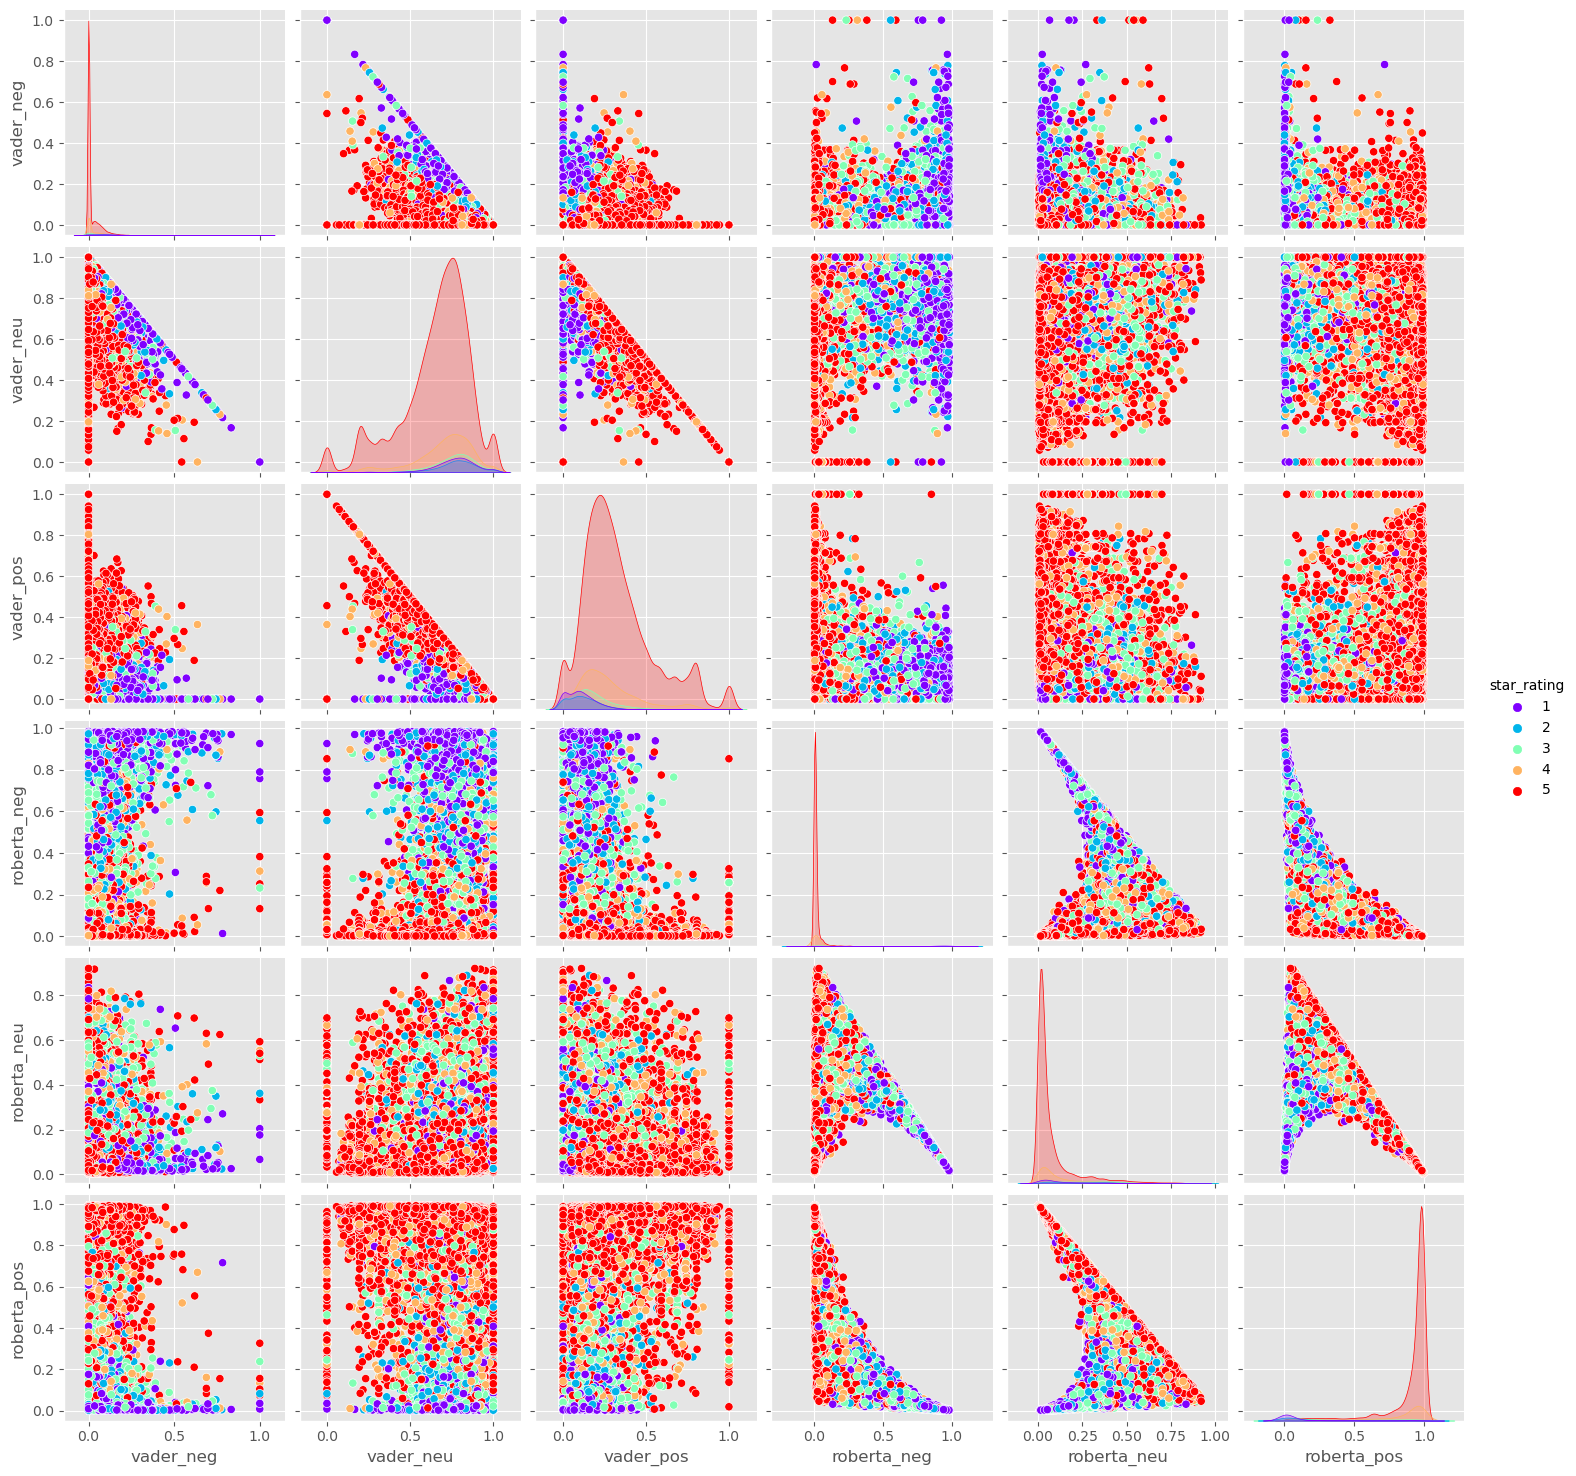

In [74]:
plt.figure(figsize=(15,5))
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='star_rating',
            palette='rainbow')
plt.show()

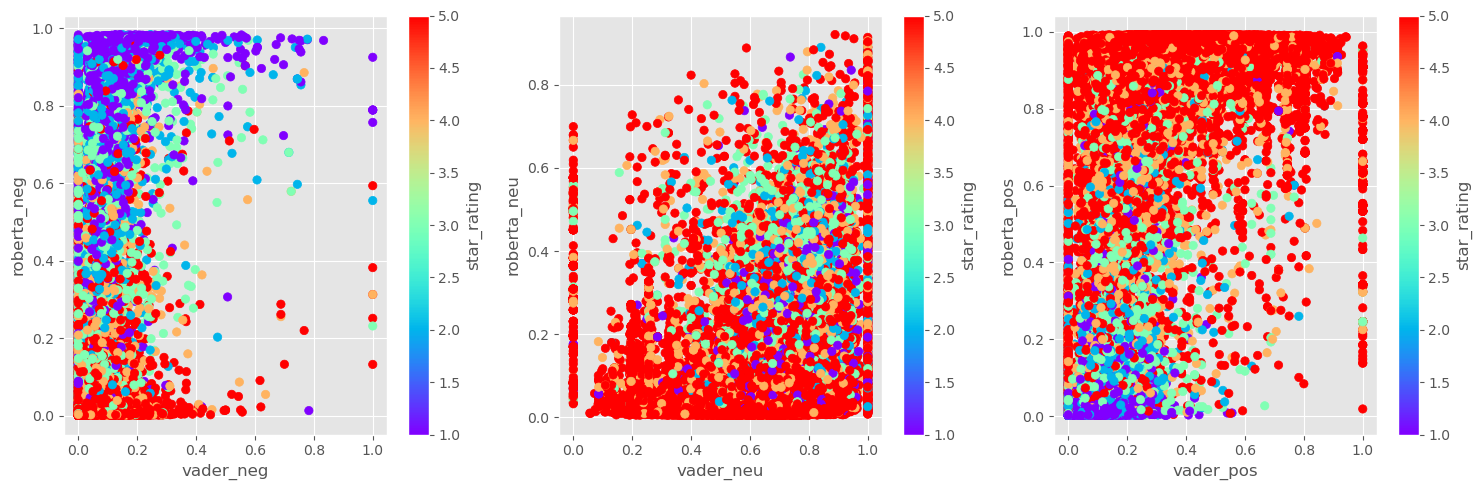

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.scatter(results_df['vader_neg'], results_df['roberta_neg'], c=results_df['star_rating'], cmap='rainbow')
plt.xlabel('vader_neg')
plt.ylabel('roberta_neg')
plt.colorbar(label='star_rating')

plt.subplot(1, 3, 2)
plt.scatter(results_df['vader_neu'], results_df['roberta_neu'], c=results_df['star_rating'], cmap='rainbow')
plt.xlabel('vader_neu')
plt.ylabel('roberta_neu')
plt.colorbar(label='star_rating')

plt.subplot(1, 3, 3)
plt.scatter(results_df['vader_pos'], results_df['roberta_pos'], c=results_df['star_rating'], cmap='rainbow')
plt.xlabel('vader_pos')
plt.ylabel('roberta_pos')
plt.colorbar(label='star_rating')

plt.tight_layout()
plt.show()